# Knapsack Greedy Algorithms

Key idea: Pick solutions by picking items one at a time.

Examples for the knapsack problem:
- Pick items in order of value ascending
- Pick items in order of value descending
- Value density - dollars per kilogram

These types of algorithms of the advantages of being quick to design and impelement. They also tend to be fast. 
Conversely, their quality can vary wildly.

In general, consider starting greedy then go beyond.

# Modeling
How to formalize an optimization task as a mathematical model. This is a declarative formulation of the problem. 

1. First choose some decision variable to encode the results we are interested in. For the knapsack problem, we let $x_i$ denote whether item i is selected for the solution.
2. Express the problem constraints in terms of these variables to specify what the solutions to these problems are. For the knapsack problem, we cannot exceed the capacity of the knapsack: $$\sum_{i \in I} w_i x_i \le K$$
3. Express the objective function to specify the quality of each solution. For the knapsack problem, 
$$
\sum_{i \in I} v_i x_i
$$

Complete formulation of the knapsack problem


$$
\begin{align}
\text{maximize}   & \sum_{i \in I} v_i x_i \\
\text{subject to} & \sum_{i \in I} w_ix_i \le K\\
& x_i \in {0, 1}
\end{align}
$$

# Dynamic Programming

Let $O(k,j)$ denote the optimal solution for capacity $k$ and items $[1..j]$. 

$$
\begin{align}
\text{maximize}   & \sum_{i \in 1..j} v_i x_i \\
\text{subject to} & \sum_{i \in 1..J} w_ix_i \le K\\
& x_i \in {0, 1} \ (i \in 1..j)
\end{align}
$$

We are ultimately interested in $O(k, j)$ and will do so by looking at subproblems.

__Assume__: We know how to solve $O(k, j-1)$ for any value of $k$. We want to solve $O(k, j)$, just one more item.

Lets consider the new item. If $w_j \le k$, there are two cases:
1. Dont select item j, then the best solution we can obtain is: $O(k, j-1)$
2. We do select the item and we find a more optimal solution: $v_j + O(k - w_j, j-1)$

In summary, we have the following recurrance relation:
$$
\begin{align}
O(k, j) &= max(O(k, j-1),\ v_j + O(k - w_j, j-1))\ if\ w_j \le k \\
O(k, j) &= O(k, j-1)\ \quad otherwise \\
O(k, 0) &= 0 \quad \text{[base case]}
\end{align}
$$

We represent this programmatically below.

### Example 1


$$
\begin{align}
\text{maximize} \quad & 5x_1 + 4x_2 + 3x_3 \\
\text{subject to} \quad & 4x_1 + 5x_2 + 2x_3 \le 9
                        & x_i \in {0, 1} \ (i\ in 1..3)
\end{align}
$$

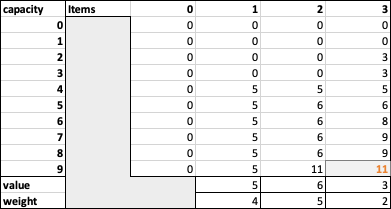

### Example 2

$$
\begin{align}
\text{maximize} \quad & 5x_1 + 6x_2 + 3x_3 \\
\text{subject to} \quad & 4x_1 + 5x_2 + 2x_3 \le 9
                        & x_i \in {0, 1} \ (i\ in 1..3)
\end{align}
$$

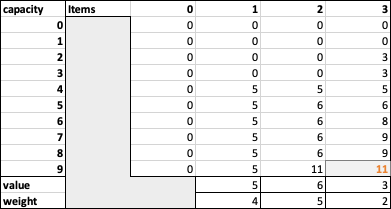

We can trace back the optimal solution like so. Look immediately to the left. If the value is same, the item was not selected.

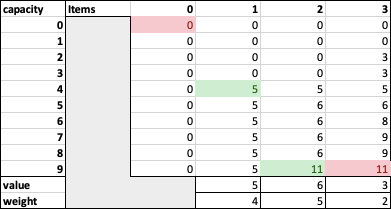

Therefore, we select item one and two.

### Example 3

$$
\begin{align}
\text{maximize} \quad & 16x_1 + 19x_2 + 23x_3 + 28x_4\\
\text{subject to} \quad & 2x_1 + 3x_2 + 4x_3 + 5x_4 \le 7
                        & x_i \in {0, 1} \ (i\ in 1..4)
\end{align}
$$

Solution:
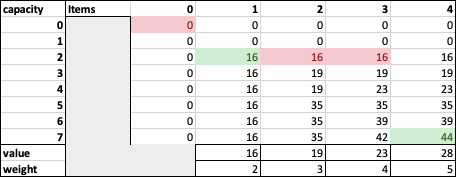

We select the first and fourth item.

### Complexity

We are looping through items and checking every possible capacity. Each check considers looking at a constant number of cells in the previous columns so that gets assumed away. Therefore, we are asymptotically $K * N$ where $K$ is the size of the knapsack and $N$ is then number of items.

This is known as pseudo-polynomial. Its efficient when $K$ is small.

# Relaxation, branch, and bound

The intuition here is that we don't want to do an exhautive search. What we'll do isntead is relax one of our constraints and get an optimistic evaluation of the upper bound (for maximization problems) for how good the rest of a subtree might be. Often times, the optimistic evaluation will be worse than some parts of the search space we have already explored.


### Example 1 - Relax the capacity constraint
$$
\begin{align}
\text{maximize} \quad & 45x_1 + 48x_2 + 35x_3 \\
\text{subject to} \quad & 5x_1 + 8x_2 + 3x_3 \le 10 \\
                        & x_i \in {0, 1} \ (i\ in 1..3)
\end{align}
$$

To relax the capacity constraint, we change 10 to 128. This is what our search space looks like when we take make optimistic evaluations by assuming we have infinite capacities.

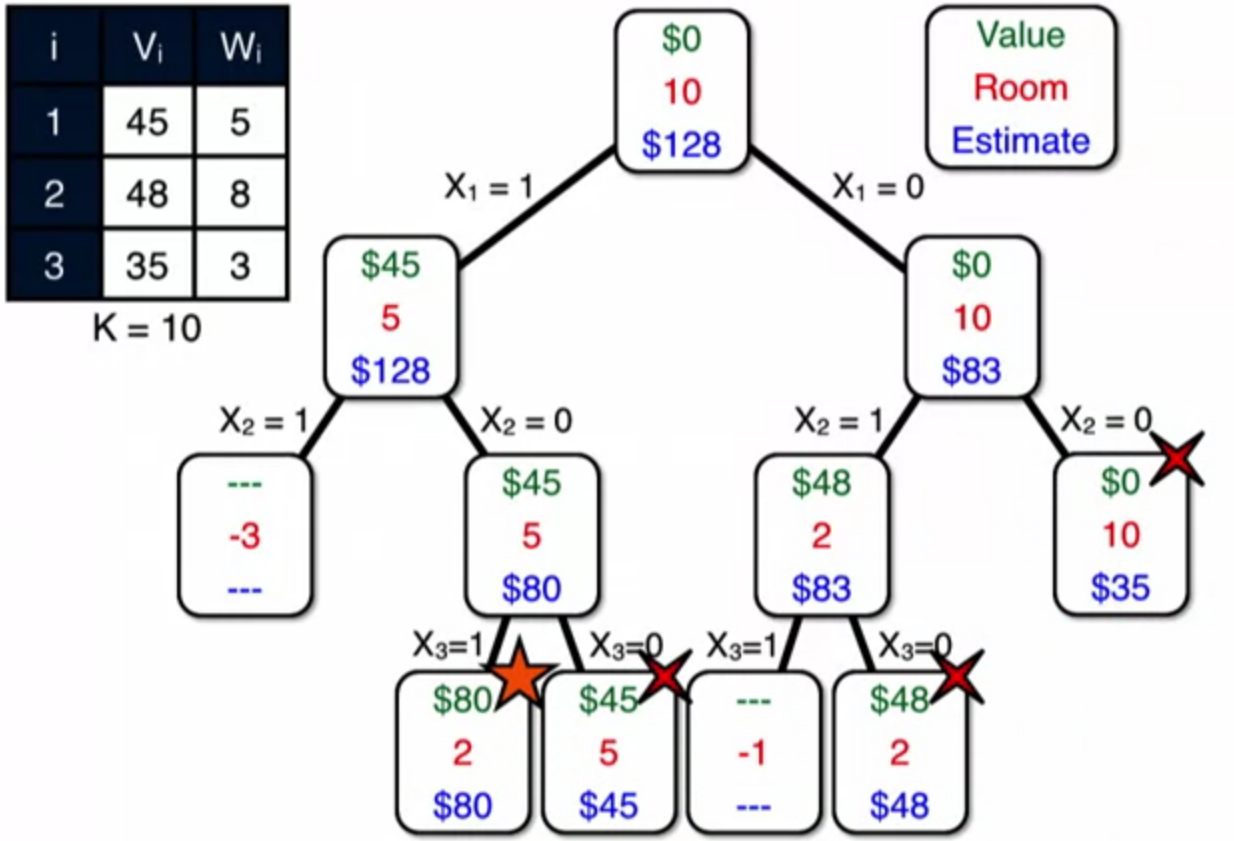

In the example above, we stop exploring after ${x_1 = 0, x_2 = 0}$ because the optimistic evaluation, 35, is less than a solution we have already found.

### Example 2 - Linear relaxation

This time, lets try taking fractional values of our decision variables.

$$
\begin{align}
\text{maximize} \quad & 45x_1 + 48x_2 + 35x_3 \\
\text{subject to} \quad & 5x_1 + 8x_2 + 3x_3 \le 10 \\
                        & 0 \le x_i \le 1 \ (i\ in 1..3)
\end{align}
$$


Algo:
1. Order the items by decreasing value ($\frac{V_i}{W_i}$)
2. Select a fraction of the last item

Example:
- $\frac{V_2}{W_2} = 6, \frac{V_1}{W_1} = 9, \frac{V_3}{W_3} = 11.7$
- Select item 3, capacity = 7
- Select item 1, capacity = 2
- Select a fourth of item 2, capacity = 0
- Estimate $= 45 + .25(48) + 35 = 92$

Now then, lets show how we use this relaxation inside of the branch and bound.
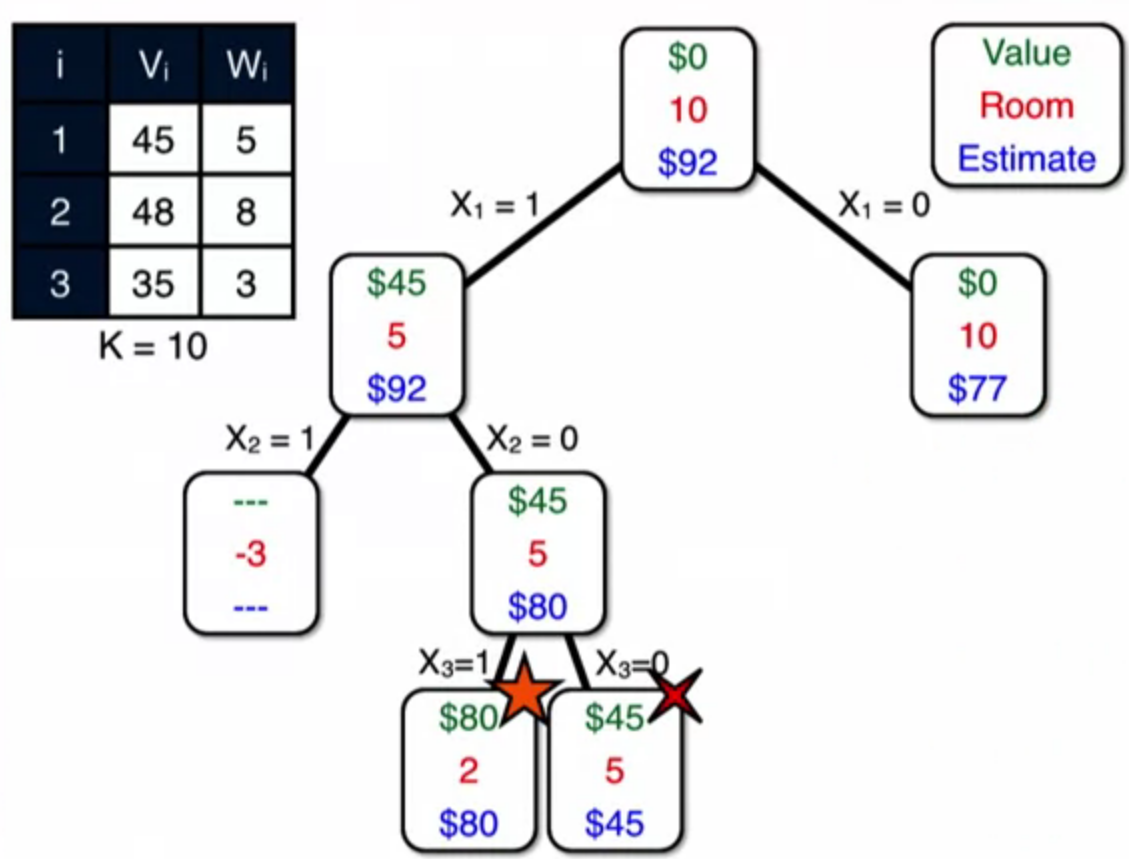

The real magic happens at $x_1 = 0$. We use the linear relaxation to calculate the upper bound of that branch. In particular, we run the algo from above, select all of item 3, then select $\frac{7}{8}$th of item 2 to find that the best we could do by continuing to explore is 77.

$$
35 + \frac{7}{8} = 77
$$

77 is worse than our previous best, 80, so lets not even bother with the rest of that branch.

## Search strategies, depth first, best first, least discrepancy


### Depth first search
In the examples above, we used DFS to to explore the search space. We don't actually need to do that! DFS goes deep from left to right. It prunes when a node estimation is worse than the previously best found solution. It explores deep so at most its holding K items in memory. 

### Best first search
Look at the item and generate the immediate children. Then it will look at the existing nodes and select the one that has the best evaluation (usually with an active relaxation) and start exploring that search space. It prunes when all nodes the nodes you could expand are worse than the best solution you have found so far. At worst, you could actually store the whole tree in memory.

### Limited discrepancy search
Intuition: Start with a greedy heuristic (like always go left) and explore it. Then allow for a single right in each path. Then allow for two rights in each path. You prunes when those exceptionts (going right) are not optimistically better than the currently best standing solution. This approach lets you trade off space and time based on how much redundancy vs memoization you build in to your implementation.

Basically, optimization is about matching the relaxation and the search. Deciding the right stategy is problem specific.
